In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pprint import pprint
import seaborn as sns

In [60]:
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
sns.set_palette('Paired')

In [4]:
data_dir = '../data/data_public/E'
build_dir = '../build/'
model_dir = os.path.join(build_dir, 'model')
metric_dir = os.path.join(build_dir, 'metric')
val_dir = os.path.join(build_dir, 'val')
tst_dir = os.path.join(build_dir, 'tst')
sub_dir = os.path.join(build_dir, 'sub')

info_file = os.path.join(data_dir, 'train', 'info.json')
train_feature_file = os.path.join(data_dir, 'train', 'main_train.data')
train_label_file = os.path.join(data_dir, 'train', 'main_train.solution')
test_feature_file = os.path.join(data_dir, 'test', 'main_test.data')
table_files = glob(os.path.join(data_dir, 'train', 'table_*.data'))

In [5]:
table_files

['../data/data_public/E/train/table_1.data',
 '../data/data_public/E/train/table_3.data',
 '../data/data_public/E/train/table_2.data']

In [6]:
with open(info_file, 'r') as f:
    info = json.load(f)
    
pprint(info)

{'relations': [{'key': ['c_01'],
                'table_A': 'main',
                'table_B': 'table_1',
                'type': 'many_to_one'},
               {'key': ['c_02'],
                'table_A': 'main',
                'table_B': 'table_2',
                'type': 'many_to_one'},
               {'key': ['c_02'],
                'table_A': 'main',
                'table_B': 'table_3',
                'type': 'many_to_one'}],
 'start_time': 1550654179,
 'tables': {'main': {'c_01': 'cat',
                     'c_02': 'cat',
                     'c_1': 'cat',
                     'c_2': 'cat',
                     'c_3': 'cat',
                     'n_1': 'num',
                     'n_2': 'num',
                     't_01': 'time'},
            'table_1': {'c_01': 'cat',
                        'c_1': 'cat',
                        'c_2': 'cat',
                        'c_3': 'cat',
                        'c_4': 'cat',
                        'm_1': 'multi-cat',
              

In [7]:
trn_feature = pd.read_csv(train_feature_file, sep='\t', parse_dates=['t_01'],
                          date_parser=lambda x: pd.to_datetime(x, unit='ms'))
print(trn_feature.shape)
trn_feature.head()

(226091, 8)


,t_01,c_1,c_2,n_1,n_2,c_3,c_02,c_01
0,2017-11-20 14:59:05.767,15471562924606739488,14771401151246747869,2.5,1.0,14917135169840250636,4450187851156539593,14418132055204351816
1,2017-11-20 10:03:41.763,15471562924606739488,14771401151246747869,2.5,1.0,14917135169840250636,4450187851156539593,14418132055204351816
2,2017-11-20 09:34:46.558,15471562924606739488,14771401151246747869,2.5,1.0,2518459674421623809,4450187851156539593,14716824702713609146
3,2017-11-20 09:54:49.547,15471562924606739488,14771401151246747869,2.5,1.0,NaN,4450187851156539593,794432844916012287
4,2017-11-20 15:17:41.648,15471562924606739488,14771401151246747869,2.5,1.0,NaN,4450187851156539593,794432844916012287


In [8]:
trn_feature.t_01.min(), trn_feature.t_01.max()

(Timestamp('2017-11-13 16:00:00.596000'),
 Timestamp('2017-11-20 15:59:58.669000'))

In [58]:
trn_label = pd.read_csv(train_label_file, sep='\t')
trn = pd.concat([trn_label, trn_feature], axis=1)
trn.label.value_counts()

0    222337
1      3754
Name: label, dtype: int64

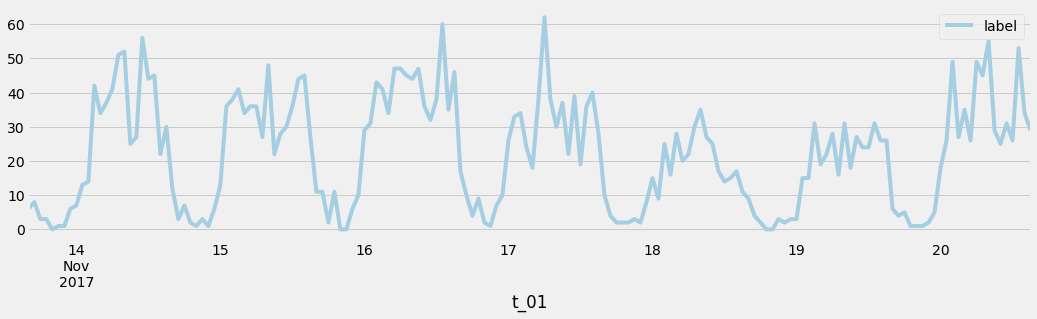

In [61]:
trn.set_index('t_01')[['label']].resample('h').sum().plot(figsize=(16, 4))

In [9]:
tst_feature = pd.read_csv(test_feature_file, sep='\t', parse_dates=['t_01'],
                          date_parser=lambda x: pd.to_datetime(x, unit='ms'))
print(tst_feature.shape)
tst_feature.head()

(34867, 8)


,t_01,c_1,c_2,n_1,n_2,c_3,c_02,c_01
0,2017-11-21 15:35:31.767,3617038521756852533,14771401151246747869,2.5,1.0,11000644521724705476,7512264136762122279,10335508634649872399
1,2017-11-21 05:55:06.763,3617038521756852533,14771401151246747869,2.5,1.0,3237176533105420620,7512264136762122279,15573771052877464161
2,2017-11-20 23:31:58.558,3617038521756852533,14771401151246747869,2.5,1.0,1212598175787106017,7512264136762122279,16687750388222936379
3,2017-11-20 23:57:50.547,3617038521756852533,14771401151246747869,2.5,1.0,NaN,7512264136762122279,11856320958148312023
4,2017-11-21 00:03:12.648,3617038521756852533,14771401151246747869,2.5,1.0,6015741703392652014,7512264136762122279,5622224912178203044


In [10]:
tst_feature.t_01.min(), tst_feature.t_01.max()

(Timestamp('2017-11-20 16:00:10.709000'),
 Timestamp('2017-11-21 15:59:57.654000'))

In [12]:
table1 = pd.read_csv(table_files[0], sep='\t')
print(table1.shape)
table1.head()

(13892, 18)


,c_01,c_1,c_2,n_1,c_3,c_4,t_1,t_2,n_2,n_3,n_4,n_5,m_1,m_2,m_3,m_4,m_5,m_6
0,141657817360361872,15189683899650635087,9187114477394342385,29.5,11864323738170122005,18326526972445440863,1.510663e+12,1502284346352,10.0,31040.5,5174.25,13201.0,8357652006919271207,"2476204046042913282,8554418078603602994,134583...",NaN,"14013827224523385745,13924136629787418617,2377...","14246580660963495450,14013827224523385745,1392...","1762300949447501459,10862091294928797775,17757..."
1,7627190405505990576,2074053462250506553,9187114477394342385,80.5,17031989361596781719,2482907635064340274,1.510401e+12,1492766587354,40.0,563432.0,21671.40,66751.0,"5188958299097531544,15505839116207172634,50464...","8203966861509557252,4467955570934160827,160020...",NaN,"14403554660461140826,7298585421408191730,20182...","14403554660461140826,7298585421408191730,12653...","11126431486381279098,7576661479484112078,16319..."
2,15904781993835271952,14389801454382229828,9187114477394342385,17.5,1444343713554106169,4413746446093453918,1.510677e+12,1506696103306,5.5,151819.0,50607.00,80701.0,"15817853823330467565,16494063293191237784,7011...","2711551123056906206,8687959850840099307,150265...",NaN,"14403554660461140826,7975891937720071101,11676...","14403554660461140826,7975891937720071101,11676...","14403554660461140826,8687959850840099307,86879..."
3,17142111567896929511,14060925946868445426,9187114477394342385,22.0,NaN,NaN,NaN,1509204445136,NaN,NaN,NaN,NaN,NaN,"9732311525218397813,5352179907982106683,346976...",NaN,NaN,16001625138235046595,"16001625138235046595,17369884179219021527,9732..."
4,4625163854139688122,6958886741426617571,9187114477394342385,22.0,12212135394287568092,6149105099135817901,1.510752e+12,1505282780110,20.5,216986.0,16692.20,44551.0,9151800639560452006,"18036760806039259242,11423154455480057061,1600...",NaN,NaN,"6536810263819856580,5514145401570336318,394850...","6536810263819856580,10768691693138110034,55141..."


In [46]:
table1.m_1[0]

'8357652006919271207'

In [44]:
table1.count()

c_01    13892
c_1     13892
c_2     13892
n_1     13892
c_3     13892
c_4     13892
t_1      7201
t_2     13892
n_2      7201
n_3      7196
n_4      7196
n_5      7196
m_1      5461
m_2     11923
m_3      1434
m_4      7664
m_5     10634
m_6     11917
dtype: int64

In [16]:
from collections import Counter

In [51]:
for col in [x for x in table1.columns if x.startswith('m_')]:
    table1['n_{}_count'.format(col)] = table1[col].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

In [52]:
table1.head()

,c_01,c_1,c_2,n_1,c_3,c_4,t_1,t_2,n_2,n_3,n_4,n_5,m_1,m_2,m_3,m_4,m_5,m_6,n_m_1_count,n_m_2_count,n_m_3_count,n_m_4_count,n_m_5_count,n_m_6_count
0,141657817360361872,15189683899650635087,9187114477394342385,29.5,11864323738170122005,18326526972445440863,1.510663e+12,1502284346352,10.0,31040.5,5174.25,13201.0,8357652006919271207,"2476204046042913282,8554418078603602994,134583...",NaN,"14013827224523385745,13924136629787418617,2377...","14246580660963495450,14013827224523385745,1392...","1762300949447501459,10862091294928797775,17757...",1,52,0,8,11,56
1,7627190405505990576,2074053462250506553,9187114477394342385,80.5,17031989361596781719,2482907635064340274,1.510401e+12,1492766587354,40.0,563432.0,21671.40,66751.0,"5188958299097531544,15505839116207172634,50464...","8203966861509557252,4467955570934160827,160020...",NaN,"14403554660461140826,7298585421408191730,20182...","14403554660461140826,7298585421408191730,12653...","11126431486381279098,7576661479484112078,16319...",257,599,0,5,22,737
2,15904781993835271952,14389801454382229828,9187114477394342385,17.5,1444343713554106169,4413746446093453918,1.510677e+12,1506696103306,5.5,151819.0,50607.00,80701.0,"15817853823330467565,16494063293191237784,7011...","2711551123056906206,8687959850840099307,150265...",NaN,"14403554660461140826,7975891937720071101,11676...","14403554660461140826,7975891937720071101,11676...","14403554660461140826,8687959850840099307,86879...",11,63,0,21,37,74
3,17142111567896929511,14060925946868445426,9187114477394342385,22.0,NaN,NaN,NaN,1509204445136,NaN,NaN,NaN,NaN,NaN,"9732311525218397813,5352179907982106683,346976...",NaN,NaN,16001625138235046595,"16001625138235046595,17369884179219021527,9732...",0,7,0,0,1,7
4,4625163854139688122,6958886741426617571,9187114477394342385,22.0,12212135394287568092,6149105099135817901,1.510752e+12,1505282780110,20.5,216986.0,16692.20,44551.0,9151800639560452006,"18036760806039259242,11423154455480057061,1600...",NaN,NaN,"6536810263819856580,5514145401570336318,394850...","6536810263819856580,10768691693138110034,55141...",1,60,0,0,19,66


In [17]:
m_1 = Counter(','.join(table1.m_1.fillna('').tolist()).split(','))
len(m_1)

26067

In [53]:
del m_1['']

In [54]:
d_m1 = pd.DataFrame.from_dict(m_1, orient='index', columns=['counts'])
d_m1.sort_values('counts', ascending=False, inplace=True)
d_m1.describe()

,counts
count,26066.000000
mean,4.335303
std,4.858621
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,68.000000


In [55]:
d_m1.head(10)

,counts
4581671456845451379,68
10249955626925342958,67
7692531997628049166,67
12750884041313425463,66
11022184443846179732,65
9553178577389741407,64
12875577006547398436,63
8248983982429402196,62
17964053711461823728,55
4076543237516216613,55


In [43]:
d_m1.tail(10)

,counts
11160625029512458874,1
17465399201897298927,1
2652975021539624255,1
15830998780470729551,1
12808870547386487784,1
3710776912578409011,1
17960807652800371168,1
17686548374344430173,1
17442523281611907043,1
13601585136116393818,1


In [37]:
(d_m1.counts > len(m_1) * .001).sum()

183

In [31]:
len(m_1) * .001

26.067

In [38]:
d_m1.nunique()

counts    59
dtype: int64

In [42]:
'asdfaf'.split(',')

['asdfaf']